# Titanic: Machine Learning from Disaster
<h3> Predict survival on the Titanic </h3>

<h3>Problem analysis</h3>

<p> In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.</p><br />
<p> RMS 타이타닉 침몰 사고 시 구명정이 탑승 승객보다 적었기 때문에 일부 사람들만 생존할 수 있었다.<br />
승객 중 어떤 그룹의 사람들은 다른 그룹들보다 생존할 확률이 높았다. ex)여성, 아이들, 상류층<br />
타이타닉호 탑승 승객 데이터를 학습하여 탑승자 정보가 들어왔을 때 생존 혹은 사망할 확률을 예측한다.</p>

<h4>- Load data and analysis</h4>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

<h3>Data Dictionary</h3>
<br/>

- survived : 0 = No(Death), 1 = Yes(Alive)
- pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd (1 > 2 > 3)
- sibsp : siblings / spouses (형제자매, 배우자가 함께 탑승한 수) (혼자면 0)
- parch : parent / children (부모님, 자식이 함께 탑승한 수) (혼자면 0)
- cabin : 객실 번호
- embarked : 탑승 선착장 C = Cherbourg, Q = Queenstown, S = Southampton
<br /><br />
<p>train data는 12개의 열을 갖고 test data는 예측하려는 Survived 열은 제거되어 11개의 열을 갖는다.</p>

In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


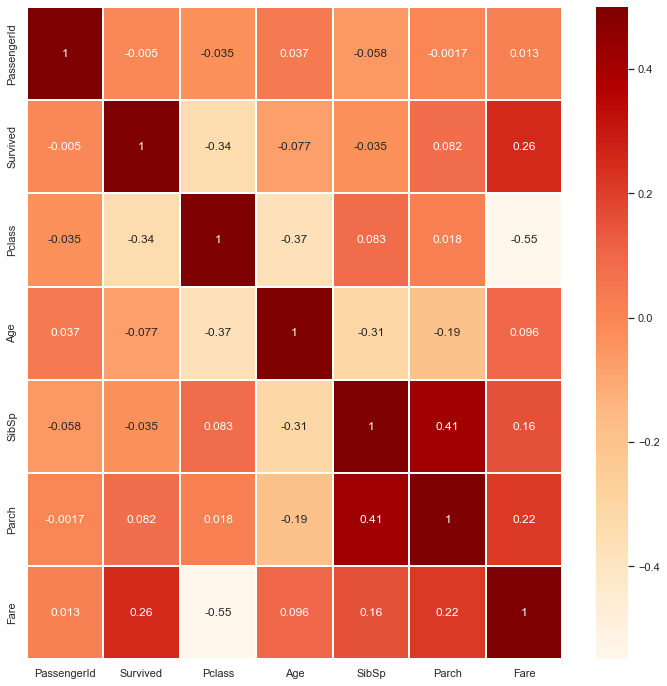

In [13]:
plt.figure(figsize=(12, 12))
sns.heatmap(train.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.OrRd, linecolor='white', annot=True)
plt.show()

<h3>Lost Information</h3>
<br/>

<p>
    dataframe.info()를 통해 Age, Cabin이 비어있는 것을 알 수 있음 (train에서 Embarked도 빠져있음)<br />
    dataframe.isnull().sum()을 통해서 null인 값이 몇행인지 확인 가능
</p>

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<h4>- Data visualization</h4>

In [16]:
# 산 사람과 죽은 사람의 각 피쳐 특징 확인
def bar_chart(feature):
    survived = train[train['Survived'] == 1][feature].value_counts() # Survived 값이 1인 행들의 feature열 수 count
    dead = train[train['Survived'] == 0][feature].value_counts() # Survived 값이 0인 행들의 feature열 수 count
    df = pd.DataFrame([survived, dead]) # 산사람과 죽은사람으로 나누어서 DataFrame으로 저장
    df.index = ['Survived', 'Dead'] # index명 지정
    df.plot(kind='bar', stacked=True, figsize=(10, 5)) # bar chart 그리기
    plt.show()

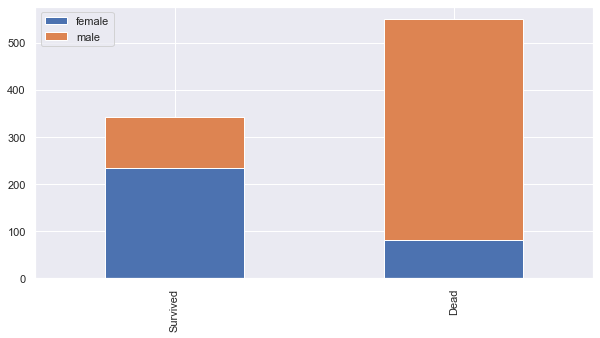

In [17]:
bar_chart('Sex')

여자가 남자보다 생존할 가능성이 높다.

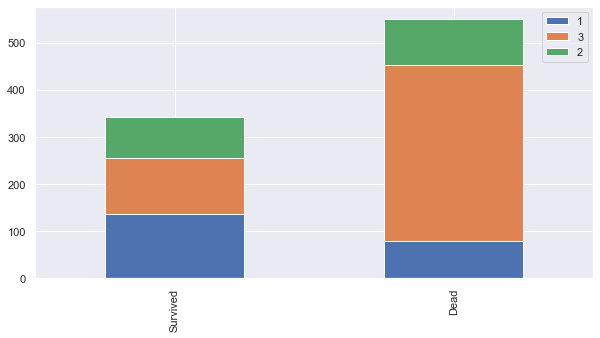

In [18]:
bar_chart('Pclass')

1등급 석의 사람은 생존 확률이 높고 3등급 석의 사람은 생존 확률이 낮다.

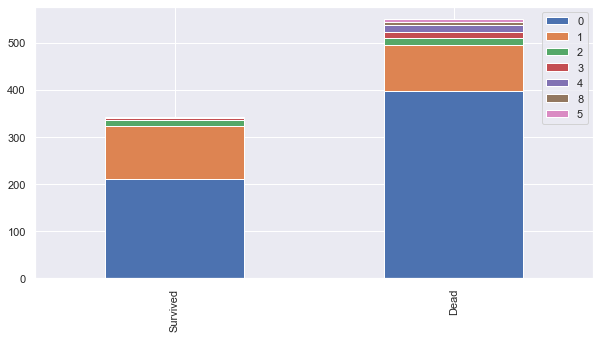

In [19]:
bar_chart('SibSp')

형제자매 없이 혼자 탔을 경우 생존 확률이 낮다.

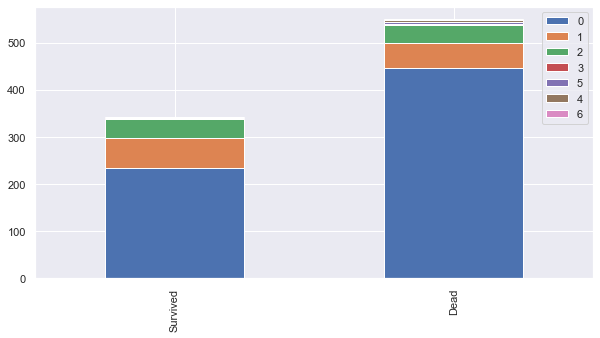

In [20]:
bar_chart('Parch')

부모자식 없이 혼자 탔을 경우 생존 확률이 낮다.

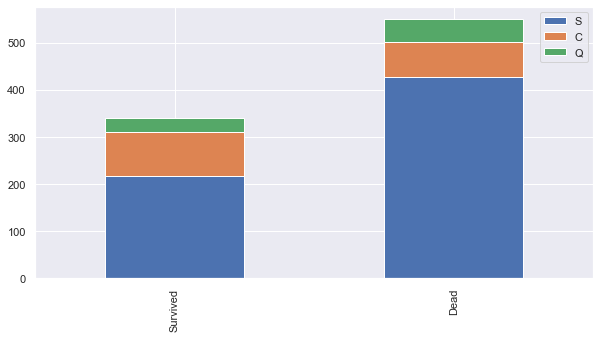

In [21]:
bar_chart('Embarked')

Queenstown에서 탑승한 승객이 생존 확률이 낮다

<h2>Feature Engineering</h2>
<p>feature들을 vector로 만드는 과정 <br/>
data를 숫자로 만들어주는 것 <br/>
NaN = Not a Number</p>

In [22]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h3>1. Name (English honorifics)</h3>
<p>자식 여부, 계급 등을 알 수 있는 지표일 것이라 가정</p>

In [23]:
train_test_data = [train, test] # train data와 test data 결합

# train_test_data의 Name필드에서 Title을 뽑음
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [24]:
# train data의 타이틀 종류 및 인원 확인
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [25]:
# test data의 타이틀 종류 및 인원 확인
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [26]:
# 타이틀별로 Mr는 0, Miss는 1, Mrs는 2, 그 외 나머지는 3으로 매핑

title_mapping = {"Mr":0, "Miss":1, "Mrs":2,
                 "Master":3, "Dr":3, "Rev":3, "Major":3, "Col":3, "Mlle":3, "Lady":3,
                 "Mme":3, "Sir":3, "Jonkheer":3, "Ms":3, "Capt":3, "Don":3, "Dona":3,
                "Countess":3}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [27]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


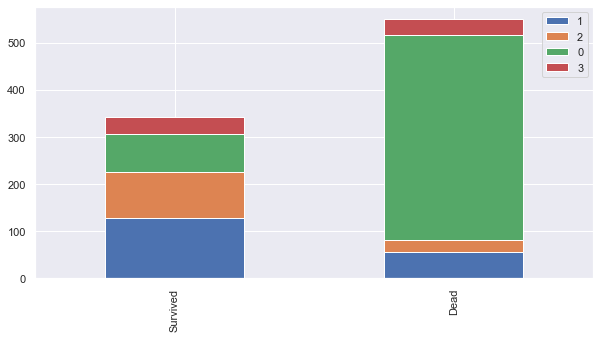

In [28]:
bar_chart('Title')

Mr 남성은 생존 확률이 적고, Miss, Mrs 여성은 생존 확률이 높음. (더이상 Name 필드는 필요가 없으므로 피쳐 삭제)

In [29]:
# 데이터셋 중 필요없는 피쳐 삭제
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


<h3>2. Sex</h3>
<p> vector로 변경 </p>

In [31]:
sex_mapping = {"male":0, "female":1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

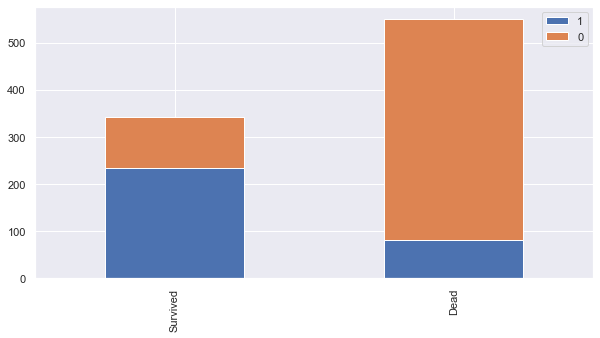

In [32]:
bar_chart('Sex')

<h3>3. Age</h3>
<p>NaN인 데이터가 포함되어 있기에 주의해야 한다.<br/>
(Missing Data)<br/><br/>
<h4>방법 1. NaN 이외 전체 탑승객들의 나이의 평균 혹은 중간값을 대입</h4></p>

- NaN인 데이터의 성별(타이틀)을 나눠 성별별 탑승객들의 나이의 중간값을 대입

In [33]:
# Age 필드의 NaN값을 Title 그룹별의 나이 중간값으로 채움
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

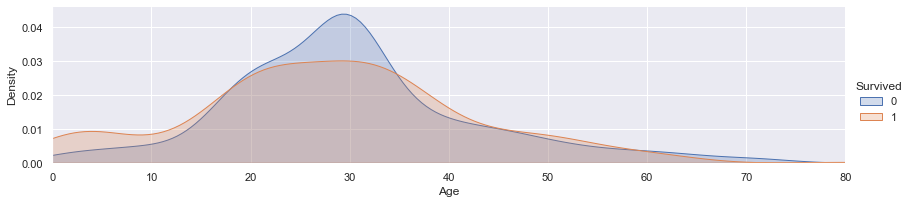

In [34]:
# train data의 나이에 따른 생사 확인
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.show()

(0.0, 20.0)

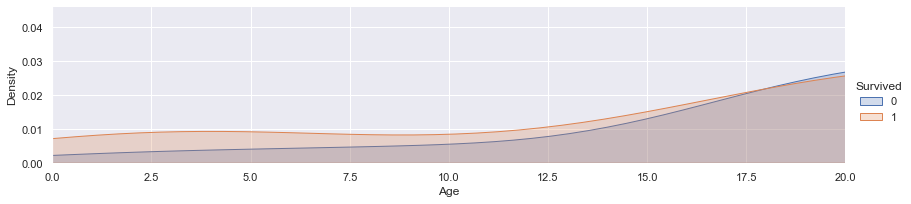

In [35]:
# 나이대별 생사 확인
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

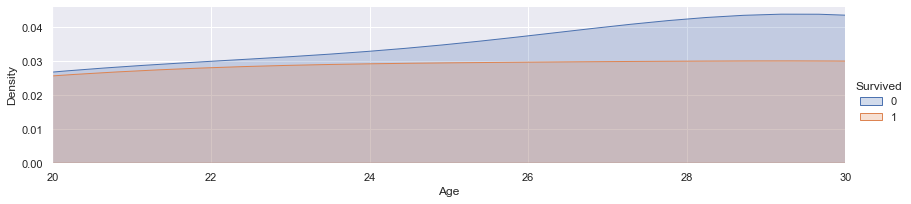

In [36]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

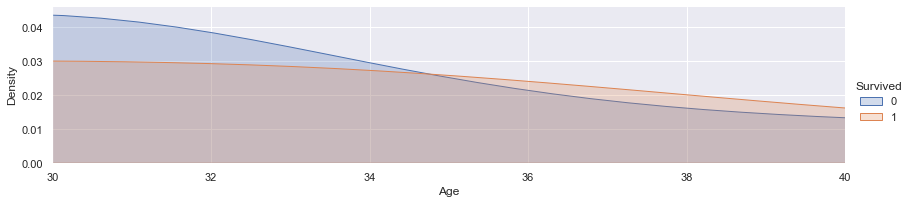

In [37]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

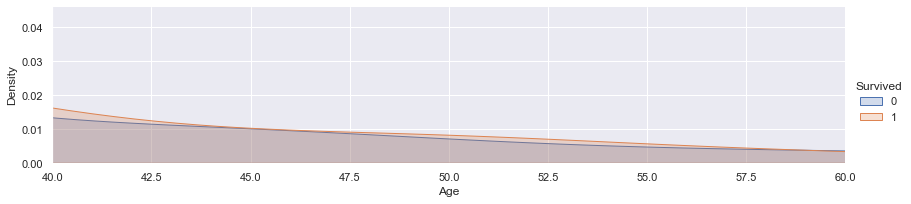

In [38]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

(60.0, 80.0)

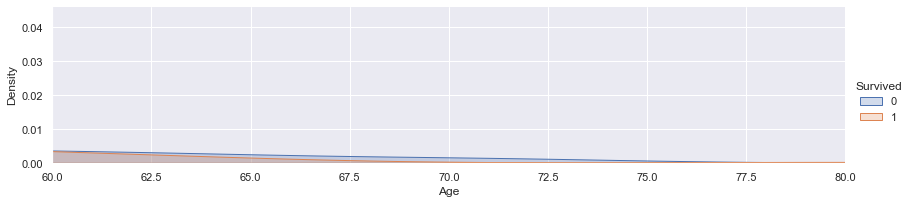

In [39]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(60)

In [40]:
# 나이대에 따라 그룹 나눔
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4

<p>Child : 0<br/>
Young : 1<br/>
Adult : 2<br/>
mid-age : 3<br/>
senior : 4
</p>

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


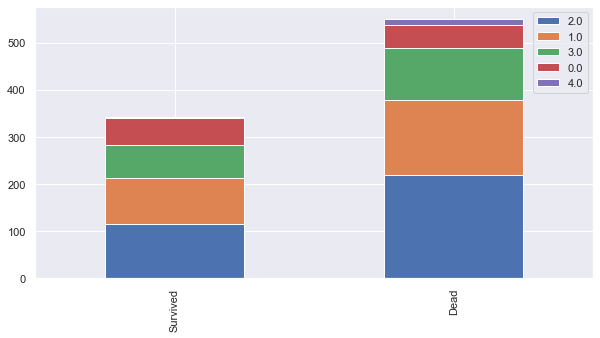

In [42]:
bar_chart('Age')

<h3>4.Embarked</h3>

<AxesSubplot:>

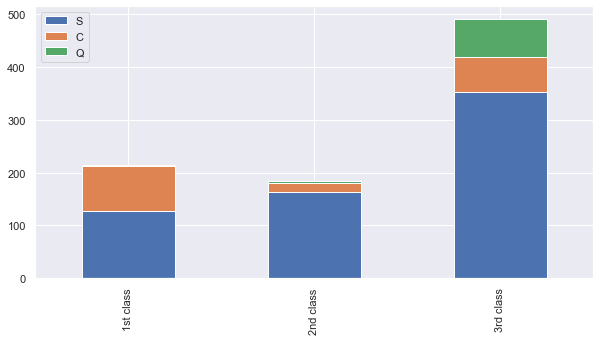

In [43]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10, 5))

Southampton에서의 탑승객이 모든 등급 좌석에서 50% 이상을 차지함.<br/>
따라서 NaN 데이터를 S로 채운다.

In [44]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [45]:
train['Embarked'].isnull().sum()

0

In [46]:
embarked_mapping = {"S":0, "C":1, "Q":2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

<h3>5. Fare</h3>

In [47]:
# 등급별 중간값을 NaN값에 넣어줌
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)

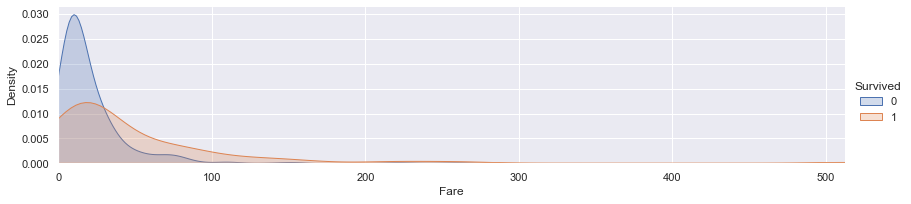

In [48]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

In [49]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 4
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 6

In [50]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,4.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,4.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


<h3>6. Cabin</h3>

In [51]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [52]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<AxesSubplot:>

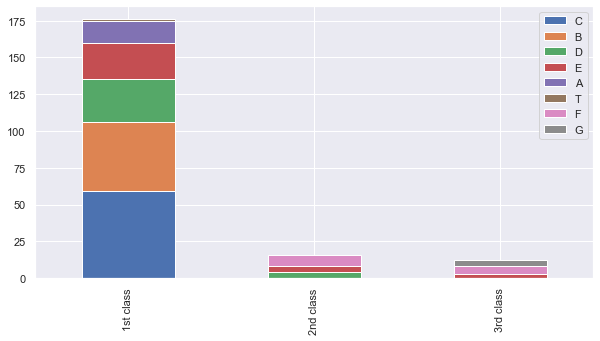

In [53]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked=True, figsize=(10, 5))

In [54]:
train.Cabin.value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [55]:
# scaling
# 머신 러닝 모델은 값의 차이가 클 수록 더 큰 의미를 부여하기 때문에 값을 스케일링 해줌
cabin_mapping = {"A":0, "B":0.7, "C":1.4, "D":2.1, "E":2.8, "F":3.5, "G":4.2, "T":4.9}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [56]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [57]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,3.50,0,0
1,2,1,1,1,3.0,1,0,PC 17599,4.0,1.40,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,3.50,0,1
3,4,1,1,1,2.0,1,0,113803,4.0,1.40,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,3.50,0,0
5,6,0,3,0,2.0,0,0,330877,0.0,3.50,2,0
6,7,0,1,0,3.0,0,0,17463,4.0,2.80,0,0
7,8,0,3,0,0.0,3,1,349909,2.0,3.50,0,3
8,9,1,3,1,2.0,0,2,347742,0.0,3.50,0,2
9,10,1,2,1,0.0,1,0,237736,4.0,3.15,1,2


<h3>7. FamilySize</h3>

In [58]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

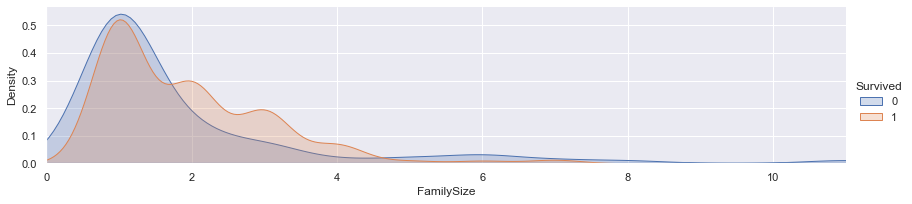

In [59]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [60]:
family_mapping = {1:0, 2:0.5, 3:1.0, 4:1.5, 5:2.0, 6:2.5, 7:3.0, 8:3.5, 9:4.0, 10:4.5, 11:5.0}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

C:\Users\wjsrj\AppData\Local\Temp\ipykernel_25940\1896144873.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

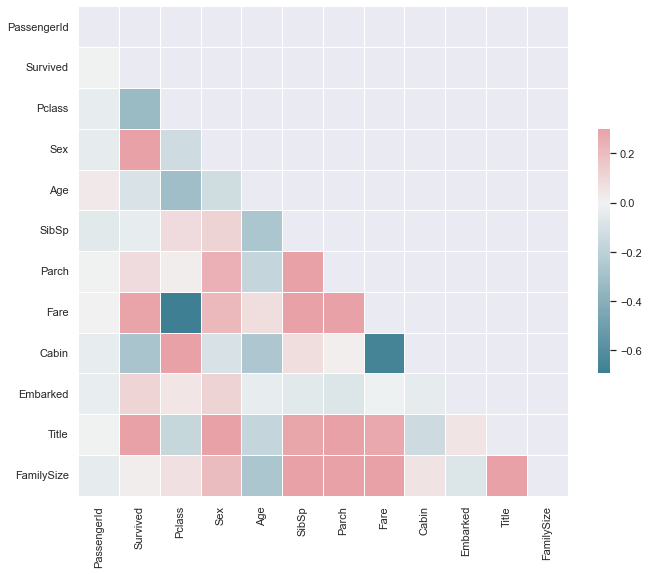

In [61]:
corr = train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,3.5,0,0,0.5
1,2,1,1,1,3.0,1,0,PC 17599,4.0,1.4,1,2,0.5
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,3.5,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,4.0,1.4,0,2,0.5
4,5,0,3,0,2.0,0,0,373450,0.0,3.5,0,0,0.0


In [63]:
# 필요없는 항목 drop
features_drop = ['Ticket', 'SibSp', 'Parch', 'Cabin']
train.drop(features_drop, axis=1, inplace=True)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [64]:
# 모델 입력데이터 구성을 위한 train_data 셋 구성
#train_data = 입력 , target = 출력
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [65]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,1.0,0.0,0,0,0.5
1,1,1,3.0,4.0,1,2,0.5
2,3,1,1.0,0.0,0,1,0.0
3,1,1,2.0,4.0,0,2,0.5
4,3,0,2.0,0.0,0,0,0.0
5,3,0,2.0,0.0,2,0,0.0
6,1,0,3.0,4.0,0,0,0.0
7,3,0,0.0,2.0,0,3,2.0
8,3,1,2.0,0.0,0,2,1.0
9,2,1,0.0,4.0,1,2,0.5


In [66]:
test = test.drop(['PassengerId'], axis=1)

In [67]:
test.head(10)

,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2,0,0.0
1,3,1,3.0,0.0,0,2,0.5
2,2,0,3.0,0.0,2,0,0.0
3,3,0,2.0,0.0,0,0,0.0
4,3,1,1.0,0.0,0,2,1.0
5,3,0,0.0,0.0,0,0,0.0
6,3,1,2.0,0.0,2,1,0.0
7,2,0,1.0,2.0,0,0,1.0
8,3,1,1.0,0.0,1,2,0.0
9,3,0,1.0,2.0,0,0,1.0


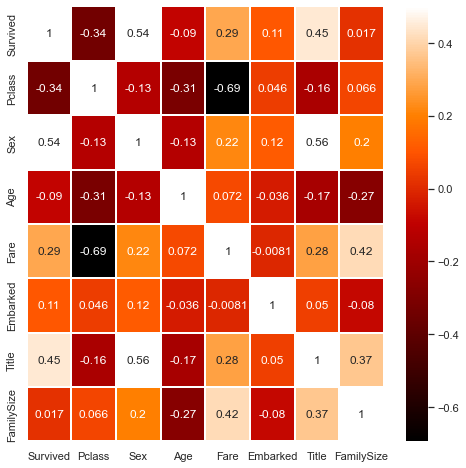

In [68]:
plt.figure(figsize=(8, 8))
sns.heatmap(train.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

In [69]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

tf.set_random_seed(777)

train_x = train_data
df = pd.DataFrame(target) # 산사람과 죽은사람으로 나누어서 DataFrame으로 저장
df.columns = ['Survived'] # index명 지정
train_y = df
test_x = test
test_y = pd.read_csv('./gender_submission.csv')
df = pd.DataFrame(test_y['Survived'])
df.columns = ['Survived']
test_y = df

Instructions for updating:
non-resource variables are not supported in the long term


In [70]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((891, 7), (891, 1), (418, 7), (418, 1))

In [71]:
X = tf.placeholder(tf.float32, shape=[None, 7])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.get_variable("W", shape=[7, 1], initializer=tf.truncated_normal_initializer(stddev=0.1))
b = tf.Variable(tf.random_normal([1]), name='bias')
H = tf.sigmoid(tf.matmul(X, W) + b)

cost = -tf.reduce_mean(Y*tf.log(H) + (1-Y) * tf.log(1-H))

train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

predicted = tf.cast(H > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

In [72]:
import time
startTime = time.time()
acc_nn = 0.0
nn_predicted_result = []
feature = train_data.columns.tolist()
Weight = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X:train_x, Y:train_y})
        if step % 1000 == 0:
            print(step, cost_val)
                  
    print('-----------------------------')
    print('train_data = ', len(train_x), 'test_data = ', len(test_x))
    Weight = sess.run(W)
    
    for i in range(len(feature)):
        print('W', i, '=', Weight[i], ', feature =', feature[i])

    h, c, y, a = sess.run([H, predicted, Y, accuracy], feed_dict={X:test_x, Y:test_y})
    
acc_nn = round(a * 100, 2)
print("accuracy : ", acc_nn)
nn_predicted_result = c
nn_predicted_result = nn_predicted_result.reshape([-1])
nn_predicted_result = nn_predicted_result.astype(int)

endTime = time.time()
print(endTime - startTime, " sec")

0 0.7467666
1000 0.4645942
2000 0.4351385
3000 0.42711112
4000 0.42409104
5000 0.423288
6000 0.42314646
7000 0.42313442
8000 0.4231342
9000 0.4231342
10000 0.42313424
-----------------------------
train_data =  891 test_data =  418
W 0 = [-0.8591187] , feature = Pclass
W 1 = [2.1707532] , feature = Sex
W 2 = [-0.48425138] , feature = Age
W 3 = [0.16330625] , feature = Fare
W 4 = [0.18363687] , feature = Embarked
W 5 = [0.6470968] , feature = Title
W 6 = [-0.8477333] , feature = FamilySize
accuracy :  93.78
13.84733271598816  sec


---------------------------------------------------------------------------------------------

In [73]:
Weight = abs(Weight)

from pandas import Series

Weight = np.reshape(Weight, [-1])

tensorflow_feat_imp = Series(Weight, index = feature)

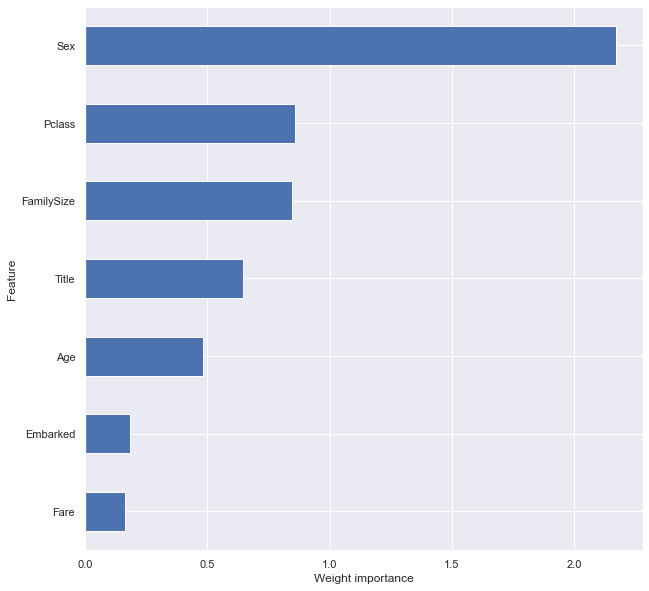

In [74]:
plt.figure(figsize=(10, 10))
tensorflow_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Weight importance')
plt.ylabel('Feature')
plt.show()

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [76]:
#Logistic Regression 모델

logreg = LogisticRegression()
logreg.fit(train_x, train_y)
Y_pred = logreg.predict(test_x)
acc_log = round(logreg.score(train_x, train_y) * 100 , 2)
acc_log

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.15

In [77]:
# Support Vector Machines 모델

svc = SVC()
svc.fit(train_x, train_y)
Y_pred = svc.predict(test_x)
acc_svc = round(svc.score(train_x, train_y) * 100, 2)
acc_svc

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


83.5

In [78]:
#K Neighbors Classifier 모델

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_x, train_y)
Y_pred = knn.predict(test_x)
acc_knn = round(knn.score(train_x, train_y) * 100, 2)
acc_knn

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


83.28

In [79]:
# Gaussian Naive Bayes 모델

gaussian = GaussianNB()
gaussian.fit(train_x, train_y)
Y_pred = gaussian.predict(test_x)
acc_gaussian = round(gaussian.score(train_x, train_y) * 100, 2)
acc_gaussian

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.36

In [80]:
# Perceptron 모델

perceptron = Perceptron()
perceptron.fit(train_x, train_y)
Y_pred = perceptron.predict(test_x)
acc_perceptron = round(perceptron.score(train_x, train_y) * 100, 2)
acc_perceptron

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


78.11

In [81]:
# Linear SVC 모델
linear_svc = LinearSVC()
linear_svc.fit(train_x, train_y)
Y_pred = linear_svc.predict(test_x)
acc_linear_svc = round(linear_svc.score(train_x, train_y) * 100, 2)
acc_linear_svc

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


81.48

In [82]:
# Stochastic Gradient Descent 모델

sgd = SGDClassifier()
sgd.fit(train_x, train_y)
Y_pred = sgd.predict(test_x)
acc_sgd = round(sgd.score(train_x, train_y) * 100, 2)
acc_sgd

c:\ProgramData\Anaconda3\envs\studying\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


73.51

In [83]:
# Decision Tree 모델

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_x, train_y)
Y_pred = decision_tree.predict(test_x)
acc_decision_tree = round(decision_tree.score(train_x, train_y) * 100, 2)
acc_decision_tree

88.55

In [84]:
# Random Forest 모델

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train_x, train_y)
Y_pred = random_forest.predict(test_x)
acc_random_forest = round(random_forest.score(train_x, train_y) * 100, 2)
acc_random_forest

C:\Users\wjsrj\AppData\Local\Temp\ipykernel_25940\2708102754.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(train_x, train_y)


88.55

In [85]:
# 머신러닝 클래스 예측 알고리즘에 따른 정확도 평가

models = pd.DataFrame({
    'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Perceptron', 'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree', 'tensorflow_model'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree, acc_nn]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,tensorflow_model,93.78
3,Random Forest,88.55
8,Decision Tree,88.55
0,Support Vector Machines,83.50
1,KNN,83.28
2,Logistic Regression,82.15
7,Linear SVC,81.48
4,Naive Bayes,80.36
5,Perceptron,78.11
6,Stochastic Gradient Decent,73.51


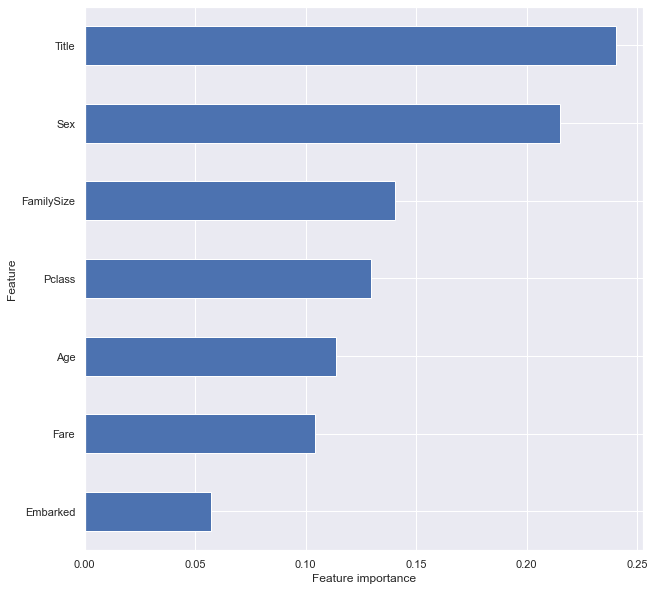

In [86]:
rf_feature_importance = random_forest.feature_importances_
rf_feat_imp = Series(rf_feature_importance, index = feature)

plt.figure(figsize=(10, 10))
rf_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [87]:
submission = pd.read_csv('./gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [88]:
# 예측 결과 csv로 저장

test = pd.read_csv('./test.csv')
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived":nn_predicted_result
})

In [89]:
submission.to_csv("./submission.csv", header=True, index=False)